In [320]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

from sklearn import metrics
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler

from sklearn.compose import ColumnTransformer

In [321]:
dataset = pd.read_csv('datasets/cars.csv')
dataset.drop('Id', axis=1, inplace=True)
dataset.tail()

,year,brand,full_model_name,model_name,price,distance_travelled(kms),fuel_type,city,brand_rank,car_age
1720,2015,Hyundai,Hyundai Eon Era +,Eon,290000.0,38000.0,Petrol,Pune,14,6.0
1721,2011,Bentley,Bentley Continental Flying Spur W12,Continental,7500000.0,36000.0,Petrol,Pune,44,10.0
1722,2008,Mahindra-Renault,Mahindra-Renault Logan DLE 1.5 dci,Logan,185000.0,142522.0,Diesel,Pune,24,13.0
1723,1990,Mahindra,Mahindra Jeep CJ 500 D,Jeep,325000.0,18581.0,Diesel,Pune,24,31.0
1724,2017,Hyundai,Hyundai Creta SX Plus 1.6 AT CRDI,Creta,1395000.0,31028.0,Diesel,Pune,14,4.0


In [322]:
dataset.isnull().sum()

year                       0
brand                      0
full_model_name            0
model_name                 0
price                      0
distance_travelled(kms)    0
fuel_type                  0
city                       0
brand_rank                 0
car_age                    0
dtype: int64

In [323]:
len(dataset['brand'].unique())

31

In [324]:
len(dataset['model_name'].unique())

169

In [325]:
len(dataset['year'].unique())

19

In [326]:
len(dataset['city'].unique())

15

In [327]:
dataset.groupby('fuel_type')['price'].count()

fuel_type
CNG + 1         8
Diesel        922
Hybrid          1
Petrol        788
Petrol + 1      6
Name: price, dtype: int64

In [328]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1725 entries, 0 to 1724
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     1725 non-null   int64  
 1   brand                    1725 non-null   object 
 2   full_model_name          1725 non-null   object 
 3   model_name               1725 non-null   object 
 4   price                    1725 non-null   float64
 5   distance_travelled(kms)  1725 non-null   float64
 6   fuel_type                1725 non-null   object 
 7   city                     1725 non-null   object 
 8   brand_rank               1725 non-null   int64  
 9   car_age                  1725 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 134.9+ KB


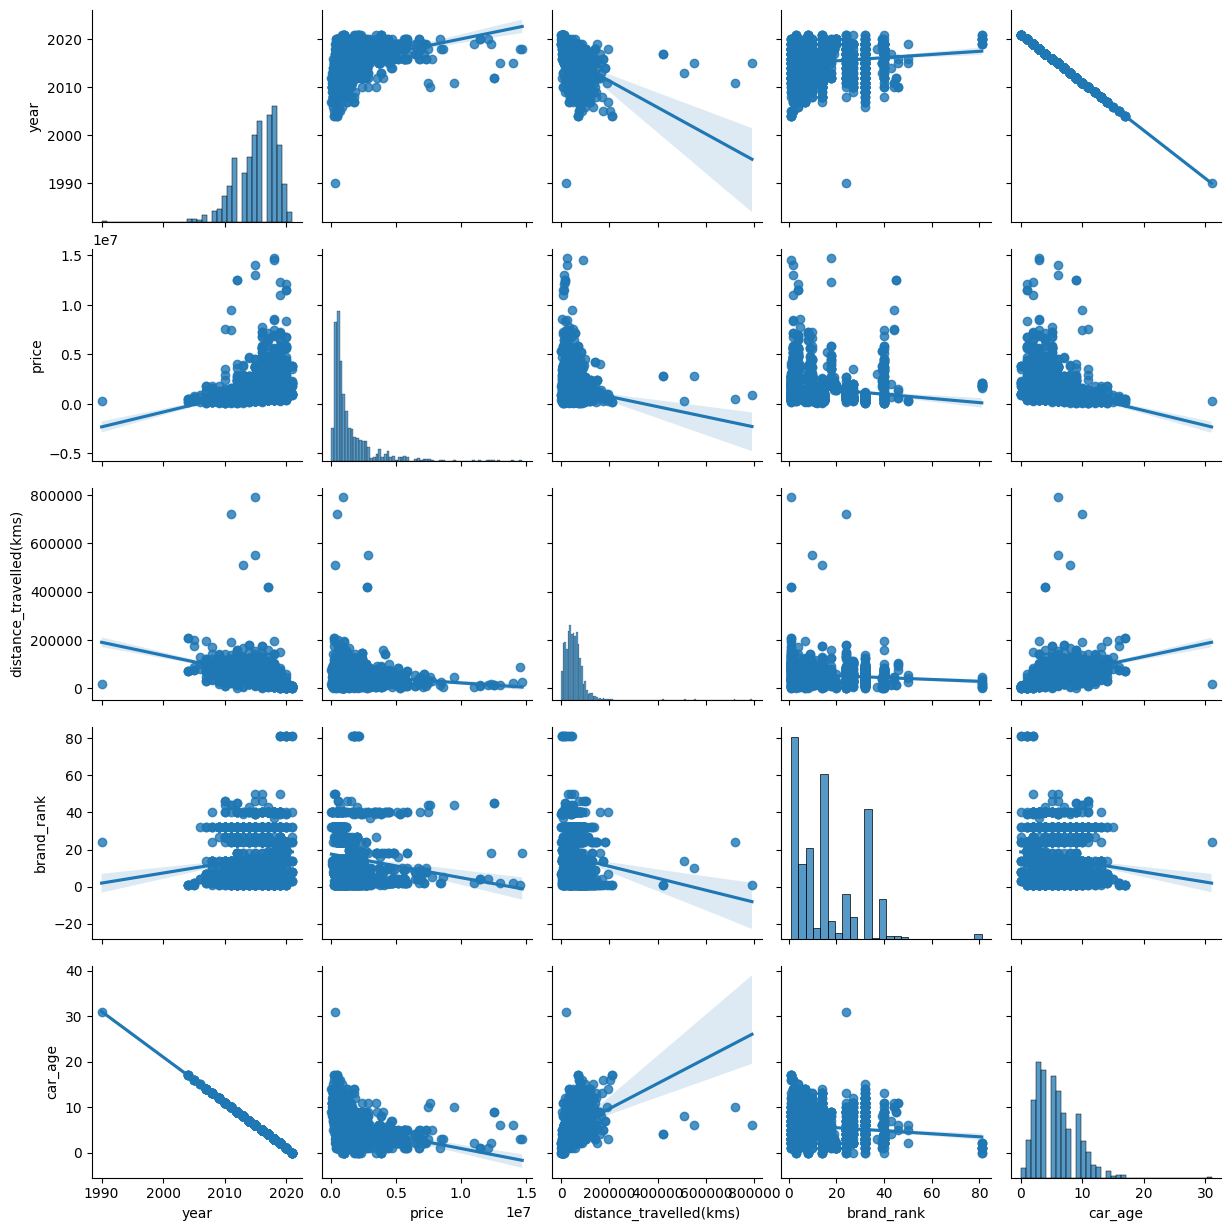

In [329]:
sns.pairplot(dataset, kind='reg')

In [330]:
le = LabelEncoder()
dataset['year'] = le.fit_transform(dataset['year'])
dataset['year'].describe()

count    1725.000000
mean       12.398261
std         3.162772
min         0.000000
25%        10.000000
50%        13.000000
75%        15.000000
max        18.000000
Name: year, dtype: float64

In [331]:
dataset['brand_rank'].describe()

count    1725.000000
mean       15.731014
std        12.951122
min         1.000000
25%         5.000000
50%        14.000000
75%        24.000000
max        81.000000
Name: brand_rank, dtype: float64

In [332]:
dataset.head(1)

,year,brand,full_model_name,model_name,price,distance_travelled(kms),fuel_type,city,brand_rank,car_age
0,13,Honda,Honda Brio S MT,Brio,425000.0,9680.0,Petrol,Mumbai,7,5.0


In [333]:
y = dataset['price'].values

dataset.drop(['full_model_name', 'model_name', 'price', 'brand', 'city'], inplace=True, axis=1)

dataset.head(1)

,year,distance_travelled(kms),fuel_type,brand_rank,car_age
0,13,9680.0,Petrol,7,5.0


In [334]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1725 entries, 0 to 1724
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     1725 non-null   int64  
 1   distance_travelled(kms)  1725 non-null   float64
 2   fuel_type                1725 non-null   object 
 3   brand_rank               1725 non-null   int64  
 4   car_age                  1725 non-null   float64
dtypes: float64(2), int64(2), object(1)
memory usage: 67.5+ KB


In [335]:
ct = ColumnTransformer(transformers=[
     ('FuelTypeEncoder', OneHotEncoder(drop='first', sparse_output=False), [2])
    ], remainder='passthrough')

X = ct.fit_transform(dataset)
X.shape

(1725, 8)

In [336]:
ct.get_feature_names_out()

array(['FuelTypeEncoder__fuel_type_Diesel',
       'FuelTypeEncoder__fuel_type_Hybrid',
       'FuelTypeEncoder__fuel_type_Petrol',
       'FuelTypeEncoder__fuel_type_Petrol + 1', 'remainder__year',
       'remainder__distance_travelled(kms)', 'remainder__brand_rank',
       'remainder__car_age'], dtype=object)

In [337]:
len(ct.get_feature_names_out())

8

In [338]:
print("X: ", X, "\n\ny: ", y)

X:  [[0.00e+00 0.00e+00 1.00e+00 ... 9.68e+03 7.00e+00 5.00e+00]
 [1.00e+00 0.00e+00 0.00e+00 ... 1.19e+05 1.10e+01 9.00e+00]
 [1.00e+00 0.00e+00 0.00e+00 ... 6.46e+04 1.00e+00 4.00e+00]
 ...
 [1.00e+00 0.00e+00 0.00e+00 ... 1.43e+05 2.40e+01 1.30e+01]
 [1.00e+00 0.00e+00 0.00e+00 ... 1.86e+04 2.40e+01 3.10e+01]
 [1.00e+00 0.00e+00 0.00e+00 ... 3.10e+04 1.40e+01 4.00e+00]] 

y:  [ 425000.  325000. 2650000. ...  185000.  325000. 1395000.]


In [339]:
import statsmodels.api as sm

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.187
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     49.41
Date:                Sat, 18 May 2024   Prob (F-statistic):           4.01e-72
Time:                        16:44:36   Log-Likelihood:                -26986.
No. Observations:                1725   AIC:                         5.399e+04
Df Residuals:                    1716   BIC:                         5.404e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.546e+05    2.2e+06     -0.161      0.8

In [340]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [341]:
sc_x = StandardScaler()
X_train_scaled = sc_x.fit_transform(X_train)
X_train

array([[1.00e+00, 0.00e+00, 0.00e+00, ..., 9.10e+04, 1.00e+00, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, ..., 3.70e+04, 1.40e+01, 3.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, ..., 1.25e+04, 3.20e+01, 2.00e+00],
       ...,
       [0.00e+00, 0.00e+00, 1.00e+00, ..., 7.50e+04, 3.20e+01, 1.30e+01],
       [1.00e+00, 0.00e+00, 0.00e+00, ..., 1.56e+04, 2.00e+00, 3.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, ..., 8.13e+04, 1.00e+01, 3.00e+00]])

In [342]:
sc_y = StandardScaler()
y_train_scaled = sc_y.fit_transform(y_train.reshape(-1, 1))
y_train_scaled

array([[-0.31],
       [-0.07],
       [-0.46],
       ...,
       [-0.74],
       [ 1.07],
       [ 0.73]])

In [343]:
X_test_scaled = sc_x.transform(X_test)
X_test_scaled

array([[-1.06, -0.03,  1.08, ..., -0.31, -0.13,  0.41],
       [-1.06, -0.03,  1.08, ..., -0.37, -1.14,  0.41],
       [-1.06, -0.03,  1.08, ..., -0.57, -0.67, -0.52],
       ...,
       [ 0.94, -0.03, -0.92, ..., -0.26, -1.14, -0.82],
       [ 0.94, -0.03, -0.92, ..., -0.61, -0.91, -1.13],
       [-1.06, -0.03,  1.08, ...,  0.42, -0.28,  0.41]])

LinearRegression - 21.3% Accuracy

In [345]:
# Train the Model on Traing Set (Multiple Linear Regression - More than one independant variable)
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

# Predict output on Test Set
y_pred = linear_regressor.predict(X_test)

# Calculate Metrics

print("MSE: ", metrics.mean_squared_error(y_test, y_pred))
print("RMSE: ", math.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred))

print("R Squared: ", metrics.r2_score(y_test, y_pred)) #Model Performance

np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)[:6, :])

MSE:  2639488026339.112
RMSE:  1624650.1242849526
MAE:  939311.6977653054
R Squared:  0.2137393210442391
[[ 963918.12  365000.  ]
 [1274086.93 1195000.  ]
 [1532028.87  575000.  ]
 [1733135.    900000.  ]
 [2096391.77 1675000.  ]
 [1946367.54 1050000.  ]]


SVM - 21.5% Accuracy

In [346]:
from sklearn.svm import SVR
svr_regressor = SVR(kernel='rbf')
svr_regressor.fit(X_train_scaled, y_train_scaled.ravel())

# Predict output on Test Set
y_pred = svr_regressor.predict(X_test_scaled)
y_pred = sc_y.inverse_transform(y_pred.reshape(-1, 1))

# Calculate Metrics

print("MSE: ", metrics.mean_squared_error(y_test, y_pred))
print("RMSE: ", math.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred))

print("R Squared: ", metrics.r2_score(y_test, y_pred)) #Model Performance

np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)[:6, :])

MSE:  2633630059309.235
RMSE:  1622846.283327301
MAE:  769850.4934356848
R Squared:  0.21548431442486815
[[ 393718.94  365000.  ]
 [ 822135.8  1195000.  ]
 [ 840249.13  575000.  ]
 [1556834.81  900000.  ]
 [1149849.94 1675000.  ]
 [1341775.31 1050000.  ]]


Decision Tree - 40.68% Accuracy

In [347]:
from sklearn.tree import DecisionTreeRegressor
dtree_regressor = DecisionTreeRegressor()
dtree_regressor.fit(X_train, y_train)

# Predict output on Test Set
y_pred = dtree_regressor.predict(X_test)

# Calculate Metrics

print("MSE: ", metrics.mean_squared_error(y_test, y_pred))
print("RMSE: ", math.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred))

print("R Squared: ", metrics.r2_score(y_test, y_pred)) #Model Performance

np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)[:6, :])

MSE:  1991051479871.1753
RMSE:  1411046.2359083686
MAE:  491220.28985507245
R Squared:  0.40689805266112045
[[ 365000.  365000.]
 [ 499000. 1195000.]
 [ 749000.  575000.]
 [ 740000.  900000.]
 [1425000. 1675000.]
 [1050000. 1050000.]]


RandomForestRegressor - 60.85% Accuracy

In [348]:
from sklearn.ensemble import RandomForestRegressor
random_forest_regressor = RandomForestRegressor()
random_forest_regressor.fit(X_train, y_train)

# Predict output on Test Set
y_pred = random_forest_regressor.predict(X_test)

# Calculate Metrics

print("MSE: ", metrics.mean_squared_error(y_test, y_pred))
print("RMSE: ", math.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred))

print("R Squared: ", metrics.r2_score(y_test, y_pred)) #Model Performance

np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)[:6, :])

MSE:  1314280033912.2412
RMSE:  1146420.5310060708
MAE:  493380.97734592296
R Squared:  0.6084972913345295
[[ 419500.  365000.]
 [ 807060. 1195000.]
 [ 765900.  575000.]
 [3499300.  900000.]
 [1588360. 1675000.]
 [1332950. 1050000.]]
